## Supported lipid membrane, 3 contrast NR data refinement

Co-refinement of Neutron reflectivity data acquired at different solvent contrasts is a quite useful method for the study of supported phospholipid membranes at the solid liquid interface. Here let's consider a 3 contrast dataset (D$_{2}$O, Si matched water and H$_{2}$O) of a DMPC supported bilayer at the Si / water interface acquired at the Platypus neutron reflectometer (ANSTO) and distributed as an example with the package [_refnx_](https://github.com/refnx/refnx/releases).

First let's import _anaklasis_

In [1]:
from anaklasis import anaklasis

We name the project as 'supported_bilayer_refinement'. All results will be exported in a folder with this name. Then we import the experimental curves and we set all input units to Angstrom.

In [2]:
project='supported_bilayer_refinement'
in_file=['bilayer_D2O.dat','bilayer_SMW.dat','bilayer_H2O.dat']
units=['A','A','A'] # all units in Angstrom

then we set the details of the fit. Note that we will perform MCMC sampling.

In [3]:
fit_mode=0 # linear FOM
fit_weight=[1,1,1] # equal fit weight for all three curves
method = 'mcmc' # perform MCMC

We have a single laterally uniform layer on the substrate (brush) so a single defined model (patch) of 100% coverage

In [4]:
patches=[1.0]

We model the interface as Si/ SiO$_{2}$ / thin water layer / inner lipid heads / inner lipid tails / outer lipid tails / outer lipid heads / water (solvent), where solvent may partially penetrate in each lipid layer. Given that the surface area per molecule ($A_{pm}$) is the same for both lipid leaflets the sld (not accounting for water penetration) and solvent volume fraction $\phi_{solv}$ of each of the 4 lipid layers is given by $sld_{i}=\frac{b_{i}}{A_{pm}t_{i}}$ and $\phi_{solv_i}=1-\frac{V_{i}}{A_{pm}t_{i}}$ where $t$ the layer thickness, $b$ and $V$ the corresponding scattering length and molecular volume respectively. We construct the model _list_ where we use 10 global_parameters and one multi_parameter.

In [5]:
system = [[
	# Re_s;d Im_sld thk rough solv description
	[  2.07e-6, 0.0, 0, 2.0, 0.0, 'Si'],
	[ 3.5e-6, 0.0, 10, 'p0', 0.0, 'SiO2'],
	[ 'm0', 0.0, 'p1', 'p0', 1.0, 'water'],
	[ 'p5/(p9*p3)', 0.0, 'p3', 'p0', '1.0-p7/(p9*p3)', 'inner_heads'],
	[ 'p6/(p9*p2)', 0.0, 'p2', 'p0', '1.0-p8/(p9*p2)', 'inner_tails'],
	[ 'p6/(p9*p2)', 0.0, 'p2', 'p0', '1.0-p8/(p9*p2)', 'outer_tails'],
	[ 'p5/(p9*p4)', 0.0, 'p4', 'p0', '1.0-p7/(p9*p4)', 'outer_heads'],
	[  'm0', 0.0,  0, 0.0, 1.0, 'bulk'],
	]]

global_param = [
    # param  min  max  description, for type 'uniform'
    # param  mean sd   description  for type 'normal'
	['p0', 2.0, 0.5, 'roughness','normal'], #free
	['p1', 3.0, 15.0, 'water_d','uniform'], #free
	['p2', 7.0, 20.0, 'tail_d','uniform'], #free
	['p3', 5.0, 15.0, 'inner_head_d','uniform'], #free
	['p4', 5.0, 15.0, 'outer_head_d','uniform'], #free
	['p5', 6.01e-4, 6.01e-4, 'b_heads','uniform'], #fixed
	['p6', -2.92e-4, -2.92e-4, 'b_tails','uniform'], #fixed
	['p7', 319, 319, 'V_heads','uniform'], #fixed
	['p8', 782, 782, 'V_tails','uniform'], #fixed
	['p9', 40, 70, 'area_lipid','uniform'], #free
	]

multi_param = [
	# param  min  max  min max min max description type
	['m0', 6.15e-6, 6.40e-6, 1.80e-6, 2.30e-6, -0.56e-6, 0.0e-6, 'solv_sld','uniform'] #free
	]

Note that we have set the water sld as a multi_parameter since it has a different value for each input curve. We have also chosen to use different min/max bound values (uniform distribution) for all three contrasts, thus leaving the solvent sld as a free parameter, accounting for not a perfect solvent exchange during the measurement procedure.

We also need to keep during refinement the solvent volume fraction of the lipid layers larger than zero. So we apply the folliwng three constraints.

In [6]:
constraints = [
	'1.0-p8/(p9*p2)>0', 
	'1.0-p7/(p9*p4)>0', 
	'1.0-p7/(p9*p3)>0', 
	]


we also define the instrumental parameters. Background and scale are left as free parameters. The data contain a 4-th column $dQ$ so we set resolution=-1 (pointwise resolution calculation).

In [7]:
resolution=[-1,-1,-1] # pointwise resolution
background = [
	[0.0,1.0e-5,'uniform'], # background is left free for all three curves
	[0.0,1.0e-5,'uniform'],
	[0.0,1.0e-5,'uniform'],
	]
scale = [
	[1.0,0.2,'normal'], # curve scale is also a free parmater for all curves
	[1.0,0.2,'normal'],
	[1.0,0.2,'normal'],
	]

We finally call the _anaklasis.fit_ function and store the results in the _tuple_ _res_.

--------------------------------------------------------------------
Program ANAKLASIS - Fit Module for X-ray/Neutron reflection datasets
version 1.1, February 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------
Project name: supported_bilayer_refinement
Using chi squared with errors figure of merit (FOM)
Fast fit mode. Using small differential evolution population size
Parameter uncertainity calculation using Markov Chain Monte Carlo
A plot summarizing results will pop-up after the end of the calculation


Directory already exists.. overwriting data..
file#1 experimental points: 136
Q units in inverse A
dQ/Q pointwise
fit weight:  1
file#2 experimental points: 92
Q units in inverse A
dQ/Q pointwise
fit weight:  1
file#3 experimental points: 99
Q units in inverse A
dQ/Q pointwise
fit weight:  1
free parameters =  15


list of free parameters: p0 (rou

100%|██████████| 500/500 [01:05<00:00,  7.59it/s]
N/50 = 10;
tau: [57.914 56.369 41.123 48.283 63.482 45.077 49.572 65.479 47.093 49.413
 44.806 47.175 50.709 45.829 46.183]
  0%|          | 1/3900 [00:00<07:51,  8.27it/s]

MCMC production run..


100%|██████████| 3900/3900 [07:27<00:00,  8.71it/s]

Calculating mean curves...
  0%|          | 0/852 [00:00<?, ?it/s]

100%|██████████| 852/852 [04:10<00:00,  3.40it/s]
Plotting curves... please wait...


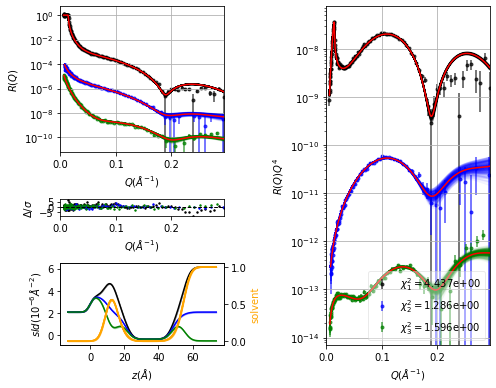

--------------------------------------------------------------------
Final model parameters
--------------------------------------------------------------------


Curve #1


Instrumental Resolution, dQ/Q: pointwise
fit weigth: 1
--------------------------------------------------------------------
Si real sld (10^-6 A^-2)      = 2.07 (fixed)
Si imaginary sld (10^-6 A^-2) = 0.00 (fixed)
Si thickness (A)              = 0.00 (fixed)
Si/SiO2 roughness (A) = 2.00 (fixed)
Si solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
SiO2 real sld (10^-6 A^-2)      = 3.50 (fixed)
SiO2 imaginary sld (10^-6 A^-2) = 0.00 (fixed)
SiO2 thickness (A)              = 10.00 (fixed)
SiO2/water roughness (A) = 3.01 (parametric), -> p0
SiO2 solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
water real sld (10^-6 A^-2)      = 6.16 (parametric), -> m0
water imaginary sld (10^-6 A^-2) = 0.00 (fixed

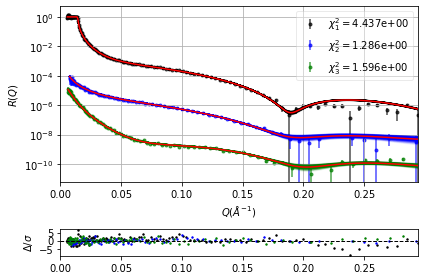

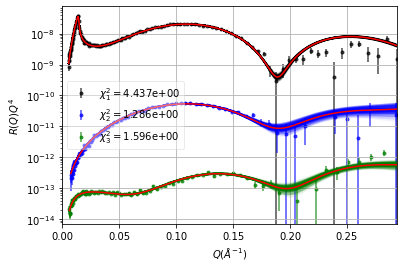

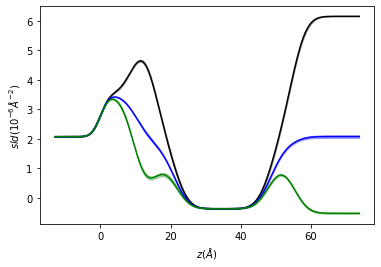

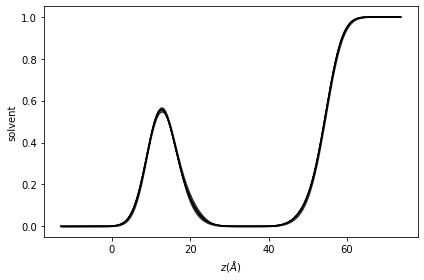

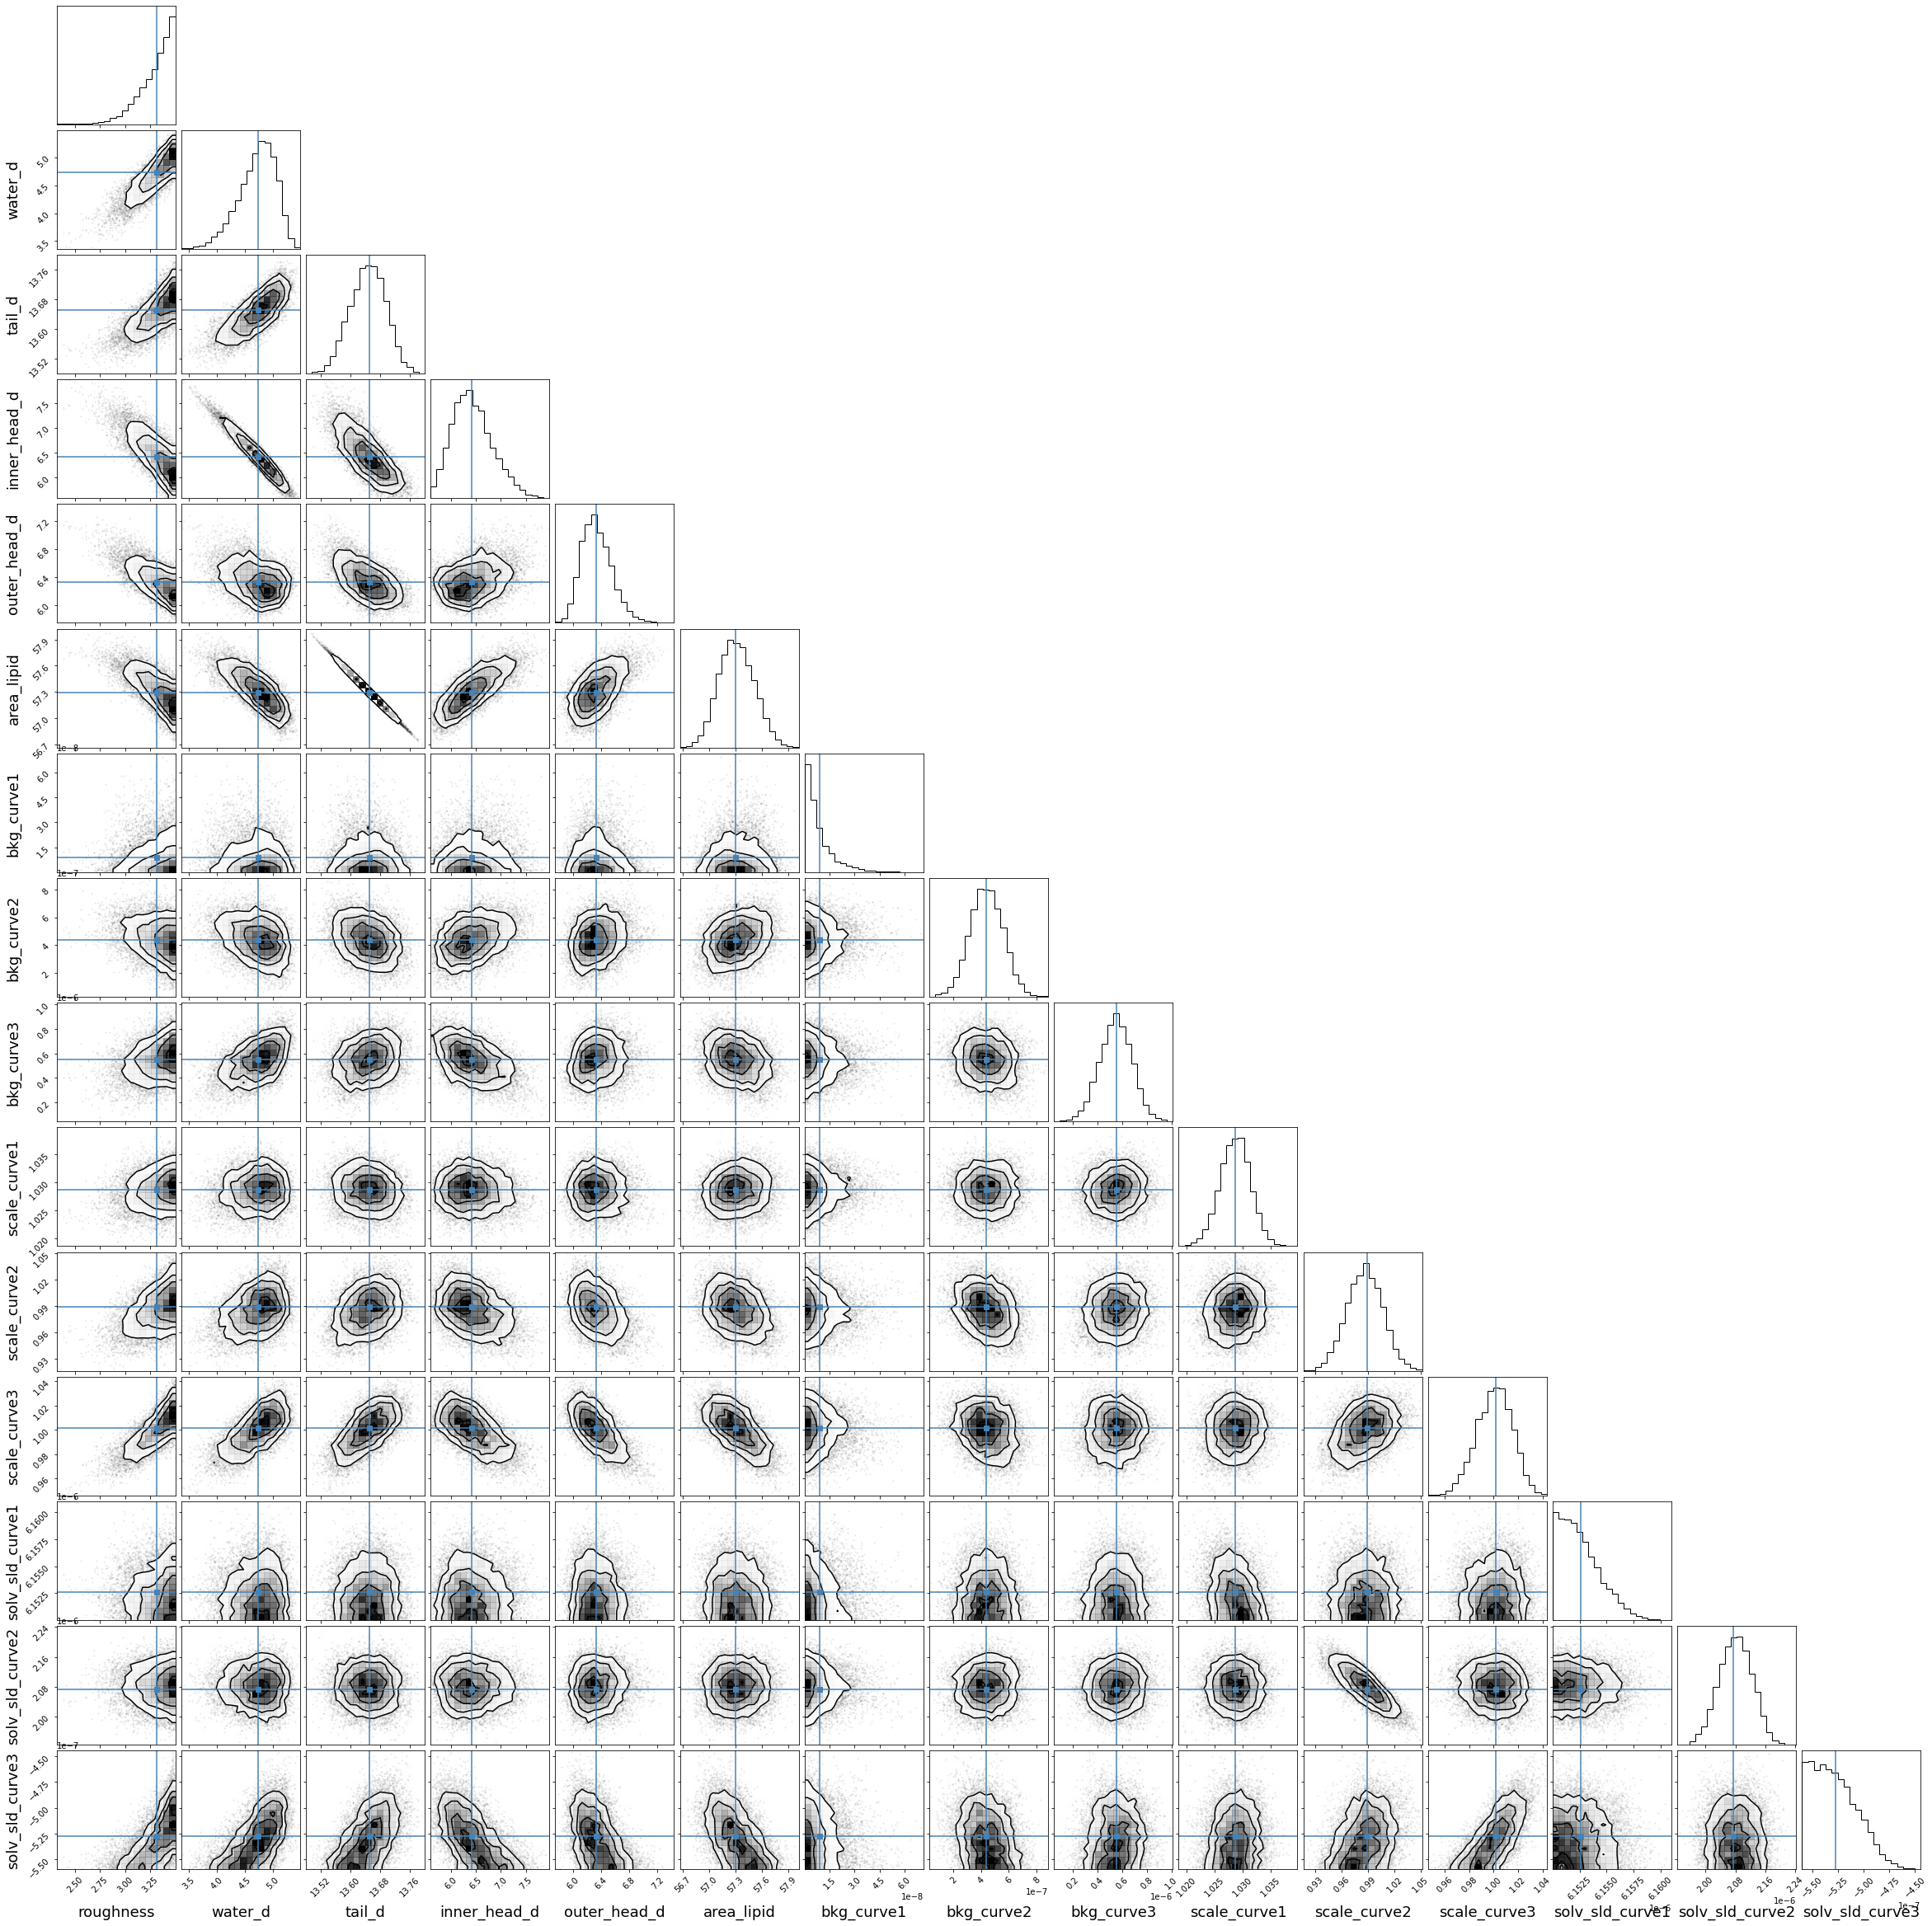

In [8]:
res = anaklasis.fit(project,in_file,units,fit_mode,fit_weight,method,resolution,patches,system,global_param,multi_param,constraints,background,scale,experror=True,plot=True,fast=True)


Detailed graphical output is generated by _anaklasis_. However postprocessing by running custom code can be performed using the data stored in the _res_ tuple.

For reference we include a detailed list of the contents of the _res_ _tuple_ in the current example:

	res[0][i][j][Q,R,R*Q^4] <- reflectivity list
	res[1][i][j][z,sld,sd sld] <- sld list
	res[2][i][j][z,solv, sd sld] <- solvent volume fraction list
	res[3][k][mean, sd] <- global_parameter fit list
	res[4][i][l][mean, sd] <- multi_parameter fit list
	res[5][i][mean, sd] <- background fit list
	res[6][i][mean, sd] <- scale fit list
	res[7][i][value] <- chi squared list

	where i the curve number starting from 0 (in the current example from 0 to 2)
	      j the model number starting from 0 (in the current example only one model so 0)
	      k the global_parameter number starting from 0 (in the current example from 0 to 3)
	      l the multi_parameter number starting from 0 (1 multi_parameter so 0)

Let's print the fitted global parameters:

In [9]:
print(res[3])

[[3.00612705349738, 0.1525326499033323], [4.948629577531751, 0.30477346115361925], [13.613220939041254, 0.042951036985882554], [6.435525424962066, 0.3627592381894465], [7.0821948985344285, 0.20398511927177268], [0.000601, 0], [-0.000292, 0], [319.0, 0], [782.0, 0], [57.451672302136416, 0.18137890866130885]]


we get the mean and standard deviation pairs for each global parameter. Fixed parameters have a zero standard deviation.